# Haberman's Survival Data Set

The dataset consists of 4 attributes:

Age: The age of the patient at the time of the operation.
Operation Year: The year in which the patient underwent the surgery (1900s)
Axillary Nodes: The number of positive axillary nodes detected. Axillary nodes are lymph nodes in the armpit region, and their involvement can indicate the spread of cancer.  The higher the number of axillary lymph nodes involved, the higher the chance of recurrent disease.

Survival Status: It has two possible values: 1 (indicating the patient survived for 5 or more years after the surgery) and 2 (indicating the patient died within 5 years of the surgery).

The dataset aims to analyze the relationship between the patients' attributes and their survival status. It is used for binary classification tasks to predict whether a patient will survive for 5 or more years based on their age, operation year, and the number of positive axillary nodes.

I will create a neural network to classify the patient survival cases.

Since the data does not have names for the columns in the .data file, with the following code I am adding the column names and creating a new data file.

# Creating the dataframe

In [1]:
columns = ['Age', 'Year of operation', 'Number of Positive Axillary Nodes', 'Survival Status']

with open("Haberman's Survival.data", 'r') as file:
    old_data = file.read()

with open('data.data', 'w') as file:
    
    file.write(','.join(columns) + '\n')
    file.write(old_data)


import os


In [2]:
import pandas as pd

data = pd.DataFrame()

#Survival Status 
# 1 = the patient survived 5 years or longer
# 2 = the patient died within 5 year

data = pd.read_csv('data.data')


In [3]:
data # The dataset has no missing values.

,Age,Year of operation,Number of Positive Axillary Nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


# Visualization of Data

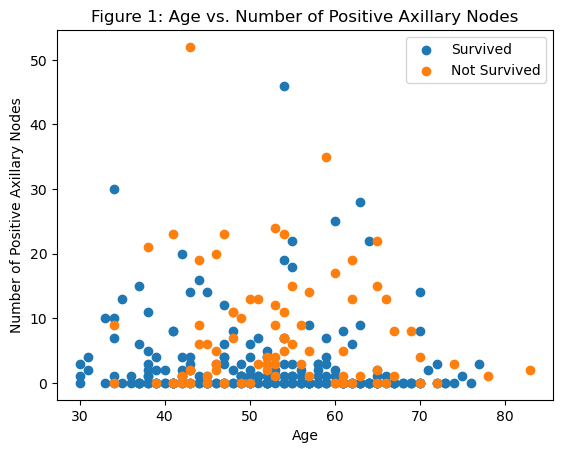

In [4]:
#Visualizing the data 
import numpy as np
import matplotlib.pyplot as plt

num_rows = data.shape[0]
array = np.arange(num_rows)

# Separating the data based on survival status
survived = data[data["Survival Status"] == 1]
not_survived = data[data["Survival Status"] == 2]


# Scatter plot of Age vs. Number of Positive Axillary Nodes
plt.scatter(survived["Age"], survived["Number of Positive Axillary Nodes"], label="Survived")
plt.scatter(not_survived["Age"], not_survived["Number of Positive Axillary Nodes"], label="Not Survived")
plt.xlabel("Age")
plt.ylabel("Number of Positive Axillary Nodes")
plt.title("Figure 1: Age vs. Number of Positive Axillary Nodes")
plt.legend()
plt.show()



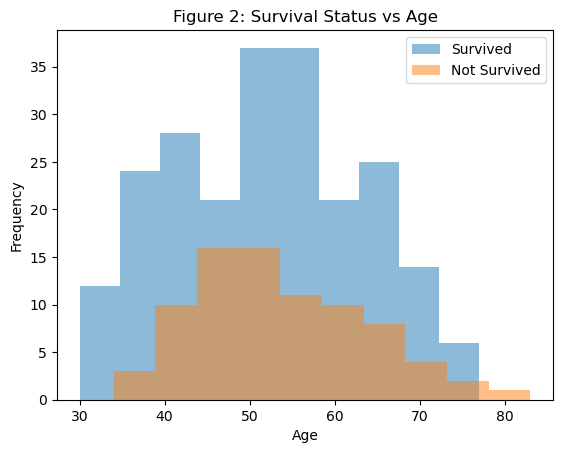

In [5]:
# Histogram of Age
plt.hist(survived["Age"], bins=10, alpha=0.5, label="Survived")
plt.hist(not_survived["Age"], bins=10, alpha=0.5, label="Not Survived")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Figure 2: Survival Status vs Age")
plt.legend()
plt.show()

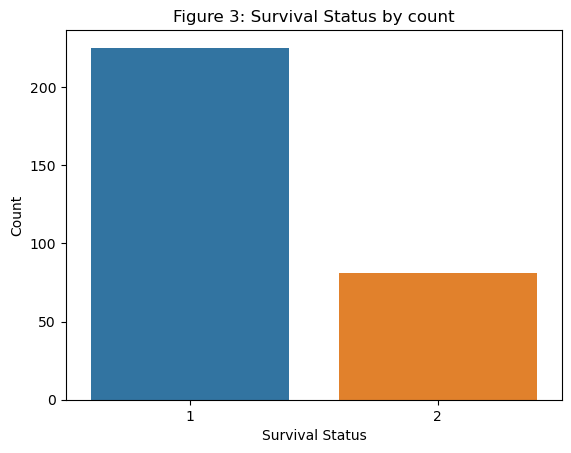

In [6]:
import seaborn as sns
# Bar plot of Survival Status
status_counts = data["Survival Status"].value_counts()
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.xlabel("Survival Status")
plt.ylabel("Count")
plt.title("Figure 3: Survival Status by count")
plt.show()

In [7]:
data

,Age,Year of operation,Number of Positive Axillary Nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [8]:
target = data['Survival Status'].values

T = np.zeros((len(target), 2), dtype=int)

#we want to present the terget two dimensionally, 1 will be 00, and 2 will be 01
for i in range(len(target)):
    if(target[i] == 2):
        T[i][1]= 1
        
T

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0,

In [9]:
data = data.drop('Survival Status', axis=1)
data

,Age,Year of operation,Number of Positive Axillary Nodes
0,30,64,1
1,30,62,3
2,30,65,0
3,31,59,2
4,31,65,4
...,...,...,...
301,75,62,1
302,76,67,0
303,77,65,3
304,78,65,1


# Preprocessing

In [10]:
from sklearn import preprocessing
import neurolab as nl
from sklearn.model_selection import train_test_split

#diving the data into a train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, T,
test_size=0.3,random_state=42)

#scaling the data
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)




# Training

# #1 
First network - 1 hidden layer with 6 nodes

In [11]:
np.random.seed(42)

#6 neurons per each hidden layer, 2 neurons for output, 
# 2 hidden layers, one output layer with two nodes, since we need two bits to represent the output
net1 = nl.net.newff(nl.tool.minmax(data), [6, 2])

#activtion function sigmoid
net1.layers[-1].transf = nl.trans.LogSig() #output layer
net1.layers[0].transf = nl.trans.LogSig() #hidden layer

C:\Users\user\anaconda3\envs\NeuralNetworks\lib\site-packages\neurolab\trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch: 100; Error: 16.47164829732641;
Epoch: 200; Error: 15.874070312132375;
Epoch: 300; Error: 14.916972767327607;
Epoch: 400; Error: 14.588598160069125;
Epoch: 500; Error: 14.362970715296909;
Epoch: 600; Error: 14.13590496790206;
Epoch: 700; Error: 13.968441137262431;
Epoch: 800; Error: 13.850196063196986;
Epoch: 900; Error: 13.75511177138326;
Epoch: 1000; Error: 13.688122049373828;
Epoch: 1100; Error: 13.633272944797858;
Epoch: 1200; Error: 13.591341886524445;
Epoch: 1300; Error: 13.554118786437005;
Epoch: 1400; Error: 13.518304148423233;
Epoch: 1500; Error: 13.491954729406654;
Epoch: 1600; Error: 13.46757416431479;
Epoch: 1700; Error: 13.448865358397232;
Epoch: 1800; Error: 13.432667764268455;
Epoch: 1900; Error: 13.412807627359308;
Epoch: 2000; Error: 13.398018863069668;
Epoch: 2100; Error: 13.382798724799844;
Epoch: 2200; Error: 13.369143259833953;
Epoch: 2300; Error: 13.354660638759288;
Epoch: 2400; Error: 13.341283112963872;
Epoch: 2500; Error: 13.32832854045731;
Epoch: 2600; E

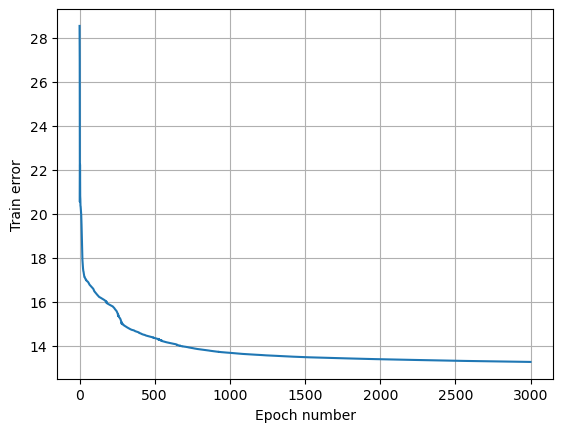

In [12]:
error1 = net1.trainf = nl.train.train_rprop(net1,X_train, y_train, epochs=3000, show=100, lr =0.3 ,goal=1e-5)
# Plot results
plt.plot(error1)
plt.xlabel('Epoch number')
plt.ylabel('Train error')
plt.grid()
plt.show();

Accuracy: 71.73913043478261


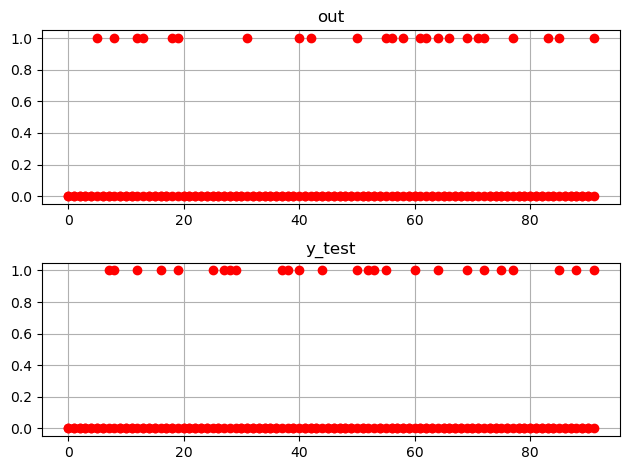

In [13]:
#Simulating the network
out1 = net1.sim(X_test)
out1 = np.around(out1)
                
#calculating the accuracy
correct1=(out1 == y_test).all(axis=1)
acc1=(np.sum(correct1)/len(out1))*100
accuracy_scores = {
    "Neural Network 1": acc1
}
print(f'Accuracy: {acc1}')

np.array_equal(out1, y_test)
plt.figure(1)
plt.subplot(2,1,1)
plt.plot(out1,'ro')
plt.title('out')
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(y_test,'ro')
plt.title('y_test')
plt.grid(True)
plt.tight_layout()
plt.show()

# #2
Second network - using 1 hidden layer with 3 nodes

In [14]:
#training the network
np.random.seed(42)

#3 neurons per each hidden layer,  2 neurons for output, 
net2 = nl.net.newff(nl.tool.minmax(data), [3,2]) 

#activation function sigmoid
net2.layers[-1].transf = nl.trans.LogSig() #output layer
net2.layers[0].transf = nl.trans.LogSig() #hidden layer


Epoch: 100; Error: 15.603407259462763;
Epoch: 200; Error: 15.448258327910905;
Epoch: 300; Error: 15.36096336450541;
Epoch: 400; Error: 15.32819434309169;
Epoch: 500; Error: 15.302222798585436;
Epoch: 600; Error: 15.282373687236856;
Epoch: 700; Error: 15.263818132948074;
Epoch: 800; Error: 15.247372441633853;
Epoch: 900; Error: 15.236630230207297;
Epoch: 1000; Error: 15.230260070680036;
Epoch: 1100; Error: 15.221793554658252;
Epoch: 1200; Error: 15.215789868296314;
Epoch: 1300; Error: 15.207478266795196;
Epoch: 1400; Error: 15.200695103913656;
Epoch: 1500; Error: 15.192071862133517;
Epoch: 1600; Error: 15.18309922976069;
Epoch: 1700; Error: 15.175360192337877;
Epoch: 1800; Error: 15.16661708018328;
Epoch: 1900; Error: 15.156374562651681;
Epoch: 2000; Error: 15.1438634282085;
Epoch: 2100; Error: 15.129576544666028;
Epoch: 2200; Error: 15.114238302000341;
Epoch: 2300; Error: 15.097298167551937;
Epoch: 2400; Error: 15.08048039230986;
Epoch: 2500; Error: 15.064319259807379;
Epoch: 2600; Err

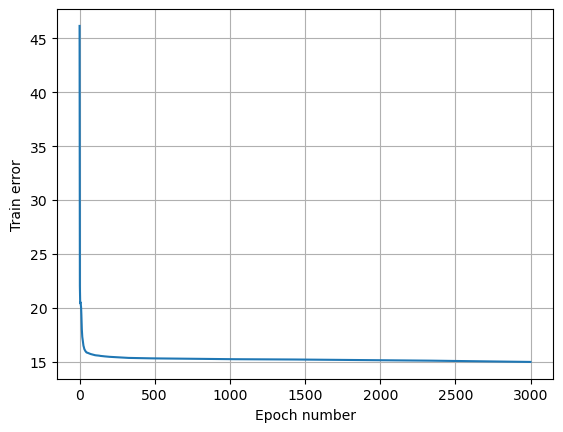

In [15]:
error2 = net2.trainf = nl.train.train_rprop(net2,X_train, y_train, epochs=3000, show=100, lr =0.3 ,goal=1e-5)
# Plot results
plt.plot(error2)
plt.xlabel('Epoch number')
plt.ylabel('Train error')
plt.grid()
plt.show();

In [16]:
#Simulating the network
out2 = net2.sim(X_test)
out2 = np.around(out2)


correct2=(out2 == y_test).all(axis=1)
acc2=(np.sum(correct2)/len(out2))*100
accuracy_scores["Neural Network 2"] = acc2
print(f'Accuracy: {acc2}')

# np.array_equal(out2, y_test)
# plt.figure(1)
# plt.subplot(2,1,1)
# plt.plot(out2,'ro')
# plt.title('out')
# plt.grid(True)
# plt.subplot(2,1,2)
# plt.plot(y_test,'ro')
# plt.title('y_test')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

Accuracy: 67.3913043478261


# #3
Since more nodes per hidden layer gave better accuracy (71%), i will change the first network to try to get better accuracy

Third network: 3 hidden layers with 6 nodes each

In [17]:
np.random.seed(42)

# 6 neurons per each hidden layer, 2 neurons for output, 
# 4 hidden layers
net3 = nl.net.newff(nl.tool.minmax(data), [6,6,6,6,2])

#activtion function sigmoid
net3.layers[-1].transf = nl.trans.LogSig() #output layer
net3.layers[0].transf = nl.trans.LogSig() #hidden layer
net3.layers[1].transf = nl.trans.LogSig() #hidden layer
net3.layers[2].transf = nl.trans.LogSig() #hidden layer
net3.layers[3].transf = nl.trans.LogSig() #hidden layer

Epoch: 100; Error: 15.674681647446151;
Epoch: 200; Error: 13.768903819334746;
Epoch: 300; Error: 13.011000528659709;
Epoch: 400; Error: 12.414320403453523;
Epoch: 500; Error: 12.161713238890858;
Epoch: 600; Error: 12.103210152155038;
Epoch: 700; Error: 12.086049332613246;
Epoch: 800; Error: 12.08012671981891;
Epoch: 900; Error: 12.077558342652953;
Epoch: 1000; Error: 12.075820736517086;
Epoch: 1100; Error: 12.07461028016425;
Epoch: 1200; Error: 12.067265081369278;
Epoch: 1300; Error: 12.066091159966904;
Epoch: 1400; Error: 12.065627145311343;
Epoch: 1500; Error: 12.065228142178974;
Epoch: 1600; Error: 12.064864951667637;
Epoch: 1700; Error: 12.064557727668033;
Epoch: 1800; Error: 12.064253572670424;
Epoch: 1900; Error: 12.064003299548457;
Epoch: 2000; Error: 12.062925226115874;
Epoch: 2100; Error: 12.062613589673516;
Epoch: 2200; Error: 12.062475618297611;
Epoch: 2300; Error: 12.062348736104244;
Epoch: 2400; Error: 12.06222214569841;
Epoch: 2500; Error: 12.06210545861952;
Epoch: 2600; 

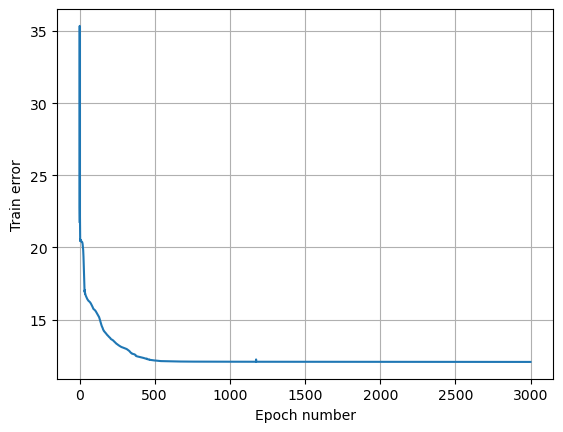

In [18]:
error3 = net3.trainf = nl.train.train_rprop(net3,X_train, y_train, epochs=3000, show=100, lr =0.3 ,goal=1e-5)

plt.plot(error3)
plt.xlabel('Epoch number')
plt.ylabel('Train error')
plt.grid()
plt.show();

In [19]:
#Simulating the network
out3 = net3.sim(X_test)
out3 = np.around(out3)


correct3 = (out3 == y_test).all(axis=1)
acc3 = (np.sum(correct3)/len(out3))*100
accuracy_scores["Neural Network 3"] = acc3
print(f'Accuracy: {acc3}')

# np.array_equal(out3, y_test)
# plt.figure(1)
# plt.subplot(2,1,1)
# plt.plot(out3,'ro')
# plt.title('out')
# plt.grid(True)
# plt.subplot(2,1,2)
# plt.plot(y_test,'ro')
# plt.title('y_test')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

Accuracy: 68.47826086956522


# #4
The accuracy got lower when I increased the number of hidden layers. 

Fourth network: 2 hidden layers with 10 nodes each

In [20]:
# 10 neurons per each hidden layer, 2 neurons for output, 
# 2 hidden layers
net4 = nl.net.newff(nl.tool.minmax(data), [2,2])

#activtion function sigmoid
net4.layers[-1].transf = nl.trans.LogSig() #output layer
net4.layers[0].transf = nl.trans.LogSig() #hidden layer
net4.layers[1].transf = nl.trans.LogSig() #hidden layer

Epoch: 100; Error: 16.778238051056682;
Epoch: 200; Error: 16.577820561160152;
Epoch: 300; Error: 16.361528183523205;
Epoch: 400; Error: 16.161837533798554;
Epoch: 500; Error: 16.025609427011688;
Epoch: 600; Error: 15.943312209181592;
Epoch: 700; Error: 15.88364877212972;
Epoch: 800; Error: 15.843470652353385;
Epoch: 900; Error: 15.81228906650797;
Epoch: 1000; Error: 15.78755730863731;
Epoch: 1100; Error: 15.767968929468019;
Epoch: 1200; Error: 15.752716526343855;
Epoch: 1300; Error: 15.74002487795672;
Epoch: 1400; Error: 15.72982375643862;
Epoch: 1500; Error: 15.720963124089826;
Epoch: 1600; Error: 15.713588748360559;
Epoch: 1700; Error: 15.707360822110369;
Epoch: 1800; Error: 15.701872199536616;
Epoch: 1900; Error: 15.697281147324778;
Epoch: 2000; Error: 15.690790087799794;
Epoch: 2100; Error: 15.684403975139753;
Epoch: 2200; Error: 15.678816904699193;
Epoch: 2300; Error: 15.673282496136007;
Epoch: 2400; Error: 15.667988765441624;
Epoch: 2500; Error: 15.662833011613888;
Epoch: 2600; E

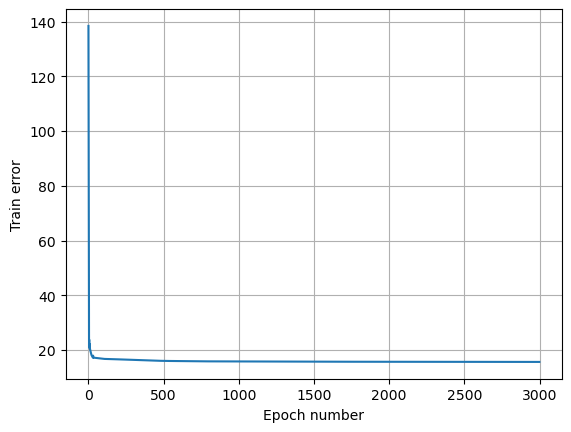

In [21]:
error4 = net4.trainf = nl.train.train_rprop(net4,X_train, y_train, epochs=3000, show=100, lr =0.3 ,goal=1e-5)

plt.plot(error4)
plt.xlabel('Epoch number')
plt.ylabel('Train error')
plt.grid()
plt.show();

In [22]:
#Simulating the network
out4 = net4.sim(X_test)
out4 = np.around(out4)


correct4 = (out4 == y_test).all(axis=1)
acc4 = (np.sum(correct4)/len(out4))*100
accuracy_scores["Neural Network 4"] = acc4
print(f'Accuracy: {acc4}')

# np.array_equal(out3, y_test)
# plt.figure(1)
# plt.subplot(2,1,1)
# plt.plot(out3,'ro')
# plt.title('out')
# plt.grid(True)
# plt.subplot(2,1,2)
# plt.plot(y_test,'ro')
# plt.title('y_test')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

Accuracy: 67.3913043478261


In [25]:
df = pd.DataFrame.from_dict(accuracy_scores, orient="index", columns=["Accuracy Score"])

print(df)

                  Accuracy Score
Neural Network 1       71.739130
Neural Network 2       67.391304
Neural Network 3       68.478261
Neural Network 4       67.391304


# #5
Since the best accuracy was of the first network, I will try to change some parameters to see how it behaves.
I will decrease the learning rate.

C:\Users\user\anaconda3\envs\NeuralNetworks\lib\site-packages\neurolab\trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch: 100; Error: 13.11570631872765;
Epoch: 200; Error: 13.112998333816552;
Epoch: 300; Error: 13.110331670824744;
Epoch: 400; Error: 13.107523176834682;
Epoch: 500; Error: 13.10495804368335;
Epoch: 600; Error: 13.102221248655832;
Epoch: 700; Error: 13.099469475882753;
Epoch: 800; Error: 13.096791092870014;
Epoch: 900; Error: 13.094276608915688;
Epoch: 1000; Error: 13.091555040048902;
Epoch: 1100; Error: 13.088960736996203;
Epoch: 1200; Error: 13.08651187793936;
Epoch: 1300; Error: 13.083836158363813;
Epoch: 1400; Error: 13.081547166815787;
Epoch: 1500; Error: 13.07929483100817;
Epoch: 1600; Error: 13.076970821732514;
Epoch: 1700; Error: 13.074482026846816;
Epoch: 1800; Error: 13.071587661601088;
Epoch: 1900; Error: 13.069376271629853;
Epoch: 2000; Error: 13.067148108218166;
Epoch: 2100; Error: 13.05978365865585;
Epoch: 2200; Error: 13.055739826411642;
Epoch: 2300; Error: 13.051916496670605;
Epoch: 2400; Error: 13.048451498843537;
Epoch: 2500; Error: 13.045122182594083;
Epoch: 2600; E

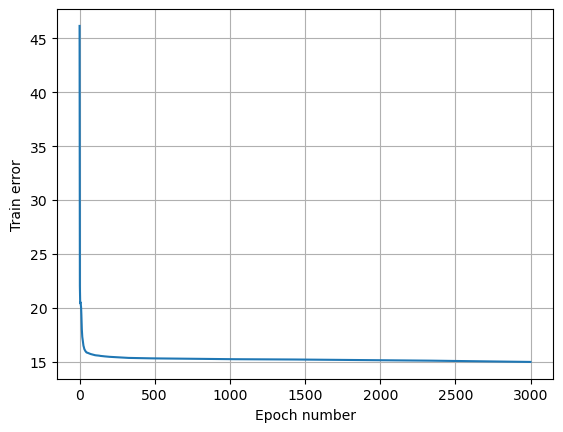

In [26]:
error5 = net1.trainf = nl.train.train_rprop(net1,X_train, y_train, epochs=3000, show=100, lr =0.001 ,goal=1e-5)
# Plot results
plt.plot(error2)
plt.xlabel('Epoch number')
plt.ylabel('Train error')
plt.grid()
plt.show();

In [27]:
#Simulating the network
out5 = net1.sim(X_test)
out5 = np.around(out5)
                
#calculating the accuracy
correct5=(out5 == y_test).all(axis=1)
acc5=(np.sum(correct5)/len(out5))*100
accuracy_scores["Neural Network 5"] = acc5
print(f'Accuracy: {acc5}')

# np.array_equal(out5, y_test)
# plt.figure(1)
# plt.subplot(2,1,1)
# plt.plot(out1,'ro')
# plt.title('out')
# plt.grid(True)
# plt.subplot(2,1,2)
# plt.plot(y_test,'ro')
# plt.title('y_test')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

Accuracy: 67.3913043478261


# #6
Since decreasing and increasing the learning rate(i tried both) only lowered the accuracy, i am going to leave the learning rate as it is: 0.3 and change the number of epochs

Epoch: 1000; Error: 12.995772807754726;
Epoch: 2000; Error: 12.970689474620343;
Epoch: 3000; Error: 12.942686334948784;
Epoch: 4000; Error: 12.899795008750548;
Epoch: 5000; Error: 12.844951736738246;
Epoch: 6000; Error: 12.796839353998191;
Epoch: 7000; Error: 12.760951386264804;
Epoch: 8000; Error: 12.734318209030658;
Epoch: 9000; Error: 12.71301993996481;
Epoch: 10000; Error: 12.69182866685344;
The maximum number of train epochs is reached


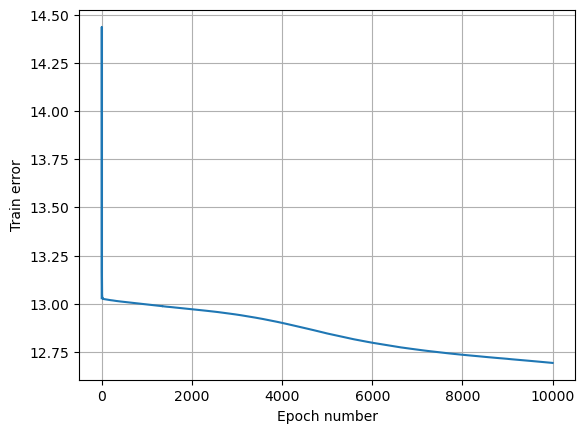

In [28]:
error6 = net1.trainf = nl.train.train_rprop(net1,X_train, y_train, epochs=10000, show=1000, lr =0.3 ,goal=1e-5)
# Plot results
plt.plot(error6)
plt.xlabel('Epoch number')
plt.ylabel('Train error')
plt.grid()
plt.show();

In [30]:
#Simulating the network
out6 = net1.sim(X_test)
out6 = np.around(out6)
                
#calculating the accuracy
correct6=(out6 == y_test).all(axis=1)
acc6=(np.sum(correct6)/len(out6))*100
accuracy_scores["Neural Network 6"] =  acc6
print(f'Accuracy: {acc6}')


Accuracy: 68.47826086956522


In [31]:
df = pd.DataFrame.from_dict(accuracy_scores, orient="index", columns=["Accuracy Score"])

print(df)

                  Accuracy Score
Neural Network 1       71.739130
Neural Network 2       67.391304
Neural Network 3       68.478261
Neural Network 4       67.391304
Neural Network 5       67.391304
Neural Network 6       68.478261


# #7
Now that I have the most efficient model: Network #1,
I will change the spliting ratios to see if I can get more accuracy.
First, I will do 50

In [32]:
#diving the data into a train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, T,
test_size=0.5,random_state=42)

#scaling the data
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

In [33]:
np.random.seed(42)

net7 = nl.net.newff(nl.tool.minmax(data), [6, 2])

#activtion function sigmoid
net7.layers[-1].transf = nl.trans.LogSig() #output layer
net7.layers[0].transf = nl.trans.LogSig() #hidden layer

C:\Users\user\anaconda3\envs\NeuralNetworks\lib\site-packages\neurolab\trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch: 100; Error: 12.378580807314421;
Epoch: 200; Error: 11.724854807825707;
Epoch: 300; Error: 11.458735961990557;
Epoch: 400; Error: 11.342579939071065;
Epoch: 500; Error: 11.253755732391149;
Epoch: 600; Error: 11.187195567323974;
Epoch: 700; Error: 11.142099531004764;
Epoch: 800; Error: 11.089765522987;
Epoch: 900; Error: 11.043504193577167;
Epoch: 1000; Error: 11.00626166894737;
Epoch: 1100; Error: 10.974882990934006;
Epoch: 1200; Error: 10.943256211218266;
Epoch: 1300; Error: 10.910618077113797;
Epoch: 1400; Error: 10.878741292232046;
Epoch: 1500; Error: 10.852608466028375;
Epoch: 1600; Error: 10.827621109352776;
Epoch: 1700; Error: 10.806735454905155;
Epoch: 1800; Error: 10.786519511027516;
Epoch: 1900; Error: 10.768975174938653;
Epoch: 2000; Error: 10.750583445897124;
Epoch: 2100; Error: 10.731248580266415;
Epoch: 2200; Error: 10.712880926103274;
Epoch: 2300; Error: 10.697033472027005;
Epoch: 2400; Error: 10.683155386773638;
Epoch: 2500; Error: 10.66802191617212;
Epoch: 2600; E

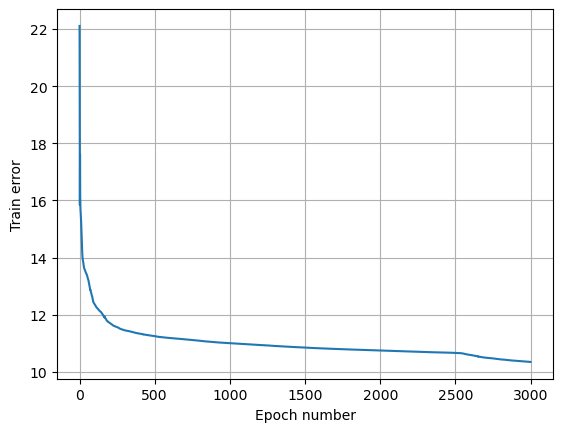

In [34]:
error7 = net7.trainf = nl.train.train_rprop(net7,X_train, y_train, epochs=3000, show=100, lr =0.3 ,goal=1e-5)
# Plot results
plt.plot(error7)
plt.xlabel('Epoch number')
plt.ylabel('Train error')
plt.grid()
plt.show();

In [35]:
#Simulating the network
out7 = net7.sim(X_test)
out7 = np.around(out7)
                
#calculating the accuracy
correct7=(out7 == y_test).all(axis=1)
acc7=(np.sum(correct7)/len(out7))*100
accuracy_scores["Neural Network 7"] = acc7
print(f'Accuracy: {acc7}')


Accuracy: 71.24183006535948


In [36]:
df = pd.DataFrame.from_dict(accuracy_scores, orient="index", columns=["Accuracy Score"])

print(df)

                  Accuracy Score
Neural Network 1       71.739130
Neural Network 2       67.391304
Neural Network 3       68.478261
Neural Network 4       67.391304
Neural Network 5       67.391304
Neural Network 6       68.478261
Neural Network 7       71.241830


# #8
Splitting 60/40

In [37]:
#diving the data into a train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, T,
test_size=0.4,random_state=42)

#scaling the data
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

In [38]:
np.random.seed(42)

net8 = nl.net.newff(nl.tool.minmax(data), [6, 2])

#activtion function sigmoid
net8.layers[-1].transf = nl.trans.LogSig() #output layer
net8.layers[0].transf = nl.trans.LogSig() #hidden layer

C:\Users\user\anaconda3\envs\NeuralNetworks\lib\site-packages\neurolab\trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch: 100; Error: 14.552318429274205;
Epoch: 200; Error: 13.79201291041059;
Epoch: 300; Error: 13.535603995850817;
Epoch: 400; Error: 13.070306274931426;
Epoch: 500; Error: 12.794190057250965;
Epoch: 600; Error: 12.532769303791754;
Epoch: 700; Error: 12.387886723710025;
Epoch: 800; Error: 12.301041546395098;
Epoch: 900; Error: 12.23598950282219;
Epoch: 1000; Error: 12.18560792372952;
Epoch: 1100; Error: 12.135949627399329;
Epoch: 1200; Error: 12.09290941957265;
Epoch: 1300; Error: 12.056695927293273;
Epoch: 1400; Error: 11.925538925891832;
Epoch: 1500; Error: 11.891089958699899;
Epoch: 1600; Error: 11.864887339086588;
Epoch: 1700; Error: 11.838452541599523;
Epoch: 1800; Error: 11.818524592665899;
Epoch: 1900; Error: 11.79760932302687;
Epoch: 2000; Error: 11.777557671831755;
Epoch: 2100; Error: 11.759629618520378;
Epoch: 2200; Error: 11.743867417328582;
Epoch: 2300; Error: 11.729117800304525;
Epoch: 2400; Error: 11.715262937807134;
Epoch: 2500; Error: 11.702706226299266;
Epoch: 2600; E

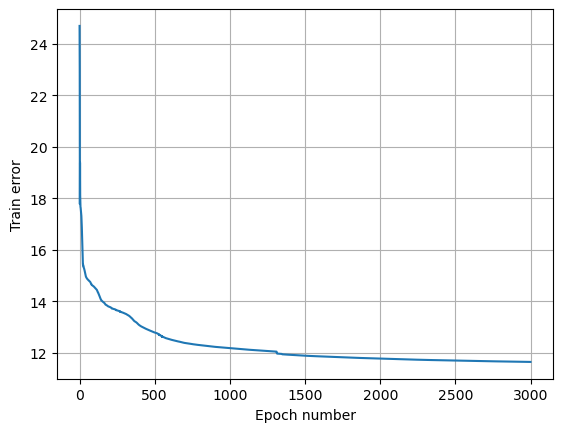

In [39]:
error8 = net8.trainf = nl.train.train_rprop(net8,X_train, y_train, epochs=3000, show=100, lr =0.3 ,goal=1e-5)
# Plot results
plt.plot(error8)
plt.xlabel('Epoch number')
plt.ylabel('Train error')
plt.grid()
plt.show();

In [41]:
#Simulating the network
out8 = net8.sim(X_test)
out8 = np.around(out8)
                
#calculating the accuracy
correct8=(out8 == y_test).all(axis=1)
acc8=(np.sum(correct8)/len(out8))*100
accuracy_scores["Neural Network 8"] = acc8
print(f'Accuracy: {acc8}')

Accuracy: 71.54471544715447


# #9

Splitting 80/20

In [42]:
#diving the data into a train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, T,
test_size=0.2,random_state=42)

#scaling the data
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

In [43]:
np.random.seed(42)

net9 = nl.net.newff(nl.tool.minmax(data), [6, 2])

#activtion function sigmoid
net9.layers[-1].transf = nl.trans.LogSig() #output layer
net9.layers[0].transf = nl.trans.LogSig() #hidden layer

C:\Users\user\anaconda3\envs\NeuralNetworks\lib\site-packages\neurolab\trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch: 100; Error: 18.537787907638027;
Epoch: 200; Error: 17.8875078614154;
Epoch: 300; Error: 17.501985570394673;
Epoch: 400; Error: 17.30618816884727;
Epoch: 500; Error: 17.119376169976505;
Epoch: 600; Error: 17.020689436294617;
Epoch: 700; Error: 16.968802376220268;
Epoch: 800; Error: 16.926411148839428;
Epoch: 900; Error: 16.872925886933107;
Epoch: 1000; Error: 16.793980578727663;
Epoch: 1100; Error: 16.536000967718298;
Epoch: 1200; Error: 16.409134982297832;
Epoch: 1300; Error: 16.34469361119541;
Epoch: 1400; Error: 16.283260995732405;
Epoch: 1500; Error: 16.202674053103244;
Epoch: 1600; Error: 16.125196480012768;
Epoch: 1700; Error: 16.041141090052438;
Epoch: 1800; Error: 15.960807800166087;
Epoch: 1900; Error: 15.887936350956526;
Epoch: 2000; Error: 15.826358159386153;
Epoch: 2100; Error: 15.781753999484028;
Epoch: 2200; Error: 15.739396471603815;
Epoch: 2300; Error: 15.706628074041474;
Epoch: 2400; Error: 15.684208198886076;
Epoch: 2500; Error: 15.663465735640838;
Epoch: 2600; 

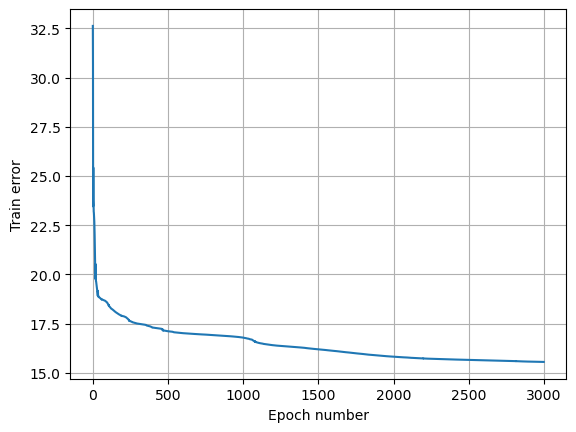

In [44]:
error9 = net9.trainf = nl.train.train_rprop(net9,X_train, y_train, epochs=3000, show=100, lr =0.3 ,goal=1e-5)
# Plot results
plt.plot(error9)
plt.xlabel('Epoch number')
plt.ylabel('Train error')
plt.grid()
plt.show();

In [45]:
#Simulating the network
out9 = net9.sim(X_test)
out9 = np.around(out9)
                
#calculating the accuracy
correct9=(out9 == y_test).all(axis=1)
acc9=(np.sum(correct9)/len(out9))*100
accuracy_scores["Neural Network 9"] = acc9
print(f'Accuracy: {acc9}')

Accuracy: 58.06451612903226


# #10

Splitting 90/10

In [46]:
#diving the data into a train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, T,
test_size=0.1,random_state=42)

#scaling the data
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

In [47]:
np.random.seed(42)

net10 = nl.net.newff(nl.tool.minmax(data), [6, 2])

#activtion function sigmoid
net10.layers[-1].transf = nl.trans.LogSig() #output layer
net10.layers[0].transf = nl.trans.LogSig() #hidden layer

Epoch: 100; Error: 21.648555536283347;
Epoch: 200; Error: 21.429031725988622;


C:\Users\user\anaconda3\envs\NeuralNetworks\lib\site-packages\neurolab\trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch: 300; Error: 21.230078288786927;
Epoch: 400; Error: 20.71971376434444;
Epoch: 500; Error: 20.145073875429194;
Epoch: 600; Error: 19.950620673020843;
Epoch: 700; Error: 19.853066657120756;
Epoch: 800; Error: 19.6596620125246;
Epoch: 900; Error: 19.617558910079097;
Epoch: 1000; Error: 19.595397309086316;
Epoch: 1100; Error: 19.5759363739407;
Epoch: 1200; Error: 19.561102848351968;
Epoch: 1300; Error: 19.546991844000146;
Epoch: 1400; Error: 19.532439759798187;
Epoch: 1500; Error: 19.515994926008517;
Epoch: 1600; Error: 19.500082825856737;
Epoch: 1700; Error: 19.480216758005856;
Epoch: 1800; Error: 19.460809466443028;
Epoch: 1900; Error: 19.43775929986461;
Epoch: 2000; Error: 19.41656533388214;
Epoch: 2100; Error: 19.396339694752808;
Epoch: 2200; Error: 19.375082600767897;
Epoch: 2300; Error: 19.355756941911682;
Epoch: 2400; Error: 19.33590935889459;
Epoch: 2500; Error: 19.317458226599747;
Epoch: 2600; Error: 19.29882652191609;
Epoch: 2700; Error: 19.281168841832027;
Epoch: 2800; Err

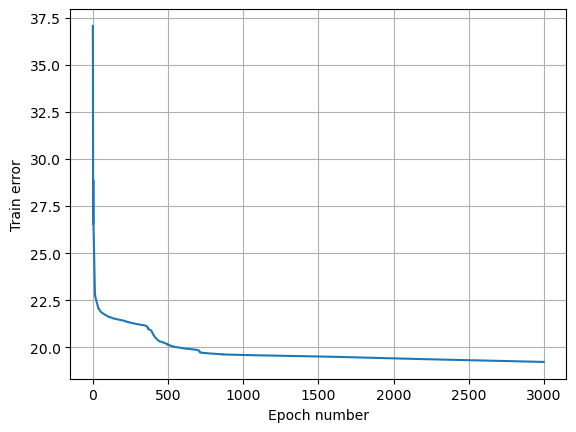

In [48]:
error10 = net10.trainf = nl.train.train_rprop(net10,X_train, y_train, epochs=3000, show=100, lr =0.3 ,goal=1e-5)
# Plot results
plt.plot(error10)
plt.xlabel('Epoch number')
plt.ylabel('Train error')
plt.grid()
plt.show();

In [49]:
#Simulating the network
out10 = net10.sim(X_test)
out10 = np.around(out10)
                
#calculating the accuracy
correct10 = (out10 == y_test).all(axis=1)
acc10 = (np.sum(correct10)/len(out10))*100
accuracy_scores["Neural Network 10"] = acc10
print(f'Accuracy: {acc10}')

Accuracy: 61.29032258064516


In [50]:
df = pd.DataFrame.from_dict(accuracy_scores, orient="index", columns=["Accuracy Score"])

print(df)

                   Accuracy Score
Neural Network 1        71.739130
Neural Network 2        67.391304
Neural Network 3        68.478261
Neural Network 4        67.391304
Neural Network 5        67.391304
Neural Network 6        68.478261
Neural Network 7        71.241830
Neural Network 8        71.544715
Neural Network 9        58.064516
Neural Network 10       61.290323


In conclusion the best model is the first model.

# Kohonen Network

From the dataframe 'data', the classes are already removed.

C:\Users\user\anaconda3\envs\NeuralNetworks\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\envs\NeuralNetworks\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\envs\NeuralNetworks\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\envs\NeuralNetworks\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are l

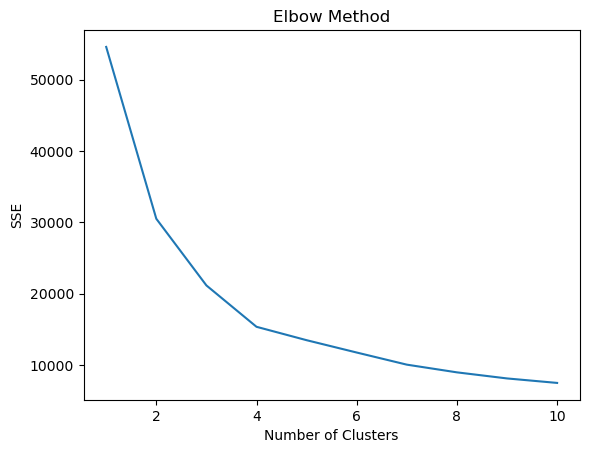

C:\Users\user\anaconda3\envs\NeuralNetworks\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\envs\NeuralNetworks\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\envs\NeuralNetworks\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\envs\NeuralNetworks\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are l

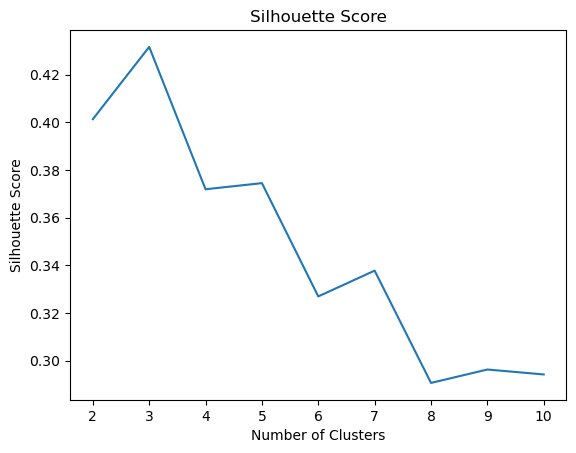

In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# determine the number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# determine the number of clusters using the silhouette score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [55]:
from sklearn import preprocessing
import neurolab as nl
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(data)


net11 = nl.net.newc(nl.tool.minmax(X), 4) # by elbow method 4 clusters


net12 = nl.net.newc(nl.tool.minmax(X), 3) #by the sillouette mscore method, 3 clusters gives the highest score


error11 = net11.trainf = nl.train.train_wta(net11, X, epochs = 1000, show = 200)
error12 = net12.trainf = nl.train.train_wta(net12, X, epochs = 1000, show = 200)


Epoch: 200; Error: 101.84433812454657;
Epoch: 400; Error: 101.84433812454671;
Epoch: 600; Error: 101.84433812454671;
Epoch: 800; Error: 101.84433812454671;
Epoch: 1000; Error: 101.84433812454671;
The maximum number of train epochs is reached
Epoch: 200; Error: 110.20848038091819;
Epoch: 400; Error: 110.20848038091819;
Epoch: 600; Error: 110.20848038091819;
Epoch: 800; Error: 110.20848038091819;
Epoch: 1000; Error: 110.20848038091819;
The maximum number of train epochs is reached


C:\Users\user\AppData\Local\Temp\ipykernel_12744\2775140987.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


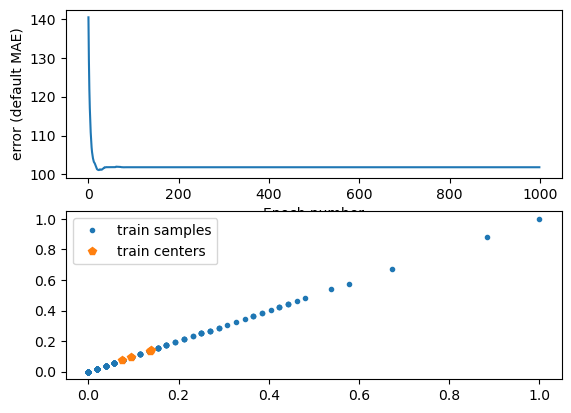

C:\Users\user\AppData\Local\Temp\ipykernel_12744\2775140987.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


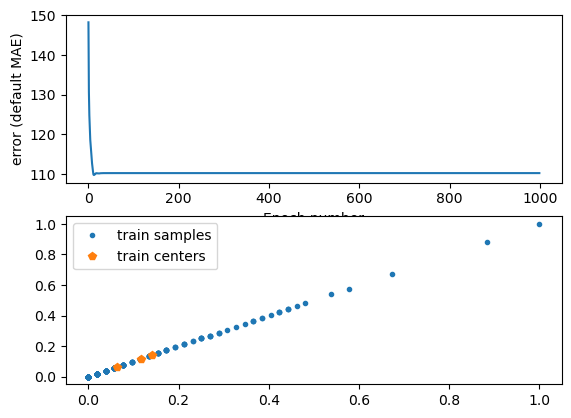

In [57]:
# Plot results:
plt.title('Example 3')
plt.subplot(2,1,1)
plt.plot(error11)
plt.xlabel('Epoch number')
plt.ylabel('error (default MAE)')
w = net11.layers[0].np['w']
plt.subplot(2,1,2)
plt.plot(X[:,2], X[:,2], '.', \
w[:,2], w[:,2], 'p')
plt.legend(['train samples', 'train centers'])
plt.show();

# Plot results:
plt.title('Example 3')
plt.subplot(2,1,1)
plt.plot(error12)
plt.xlabel('Epoch number')
plt.ylabel('error (default MAE)')
w = net12.layers[0].np['w']
plt.subplot(2,1,2)
plt.plot(X[:,2], X[:,2], '.', \
w[:,2], w[:,2], 'p')
plt.legend(['train samples', 'train centers'])
plt.show();